In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import importlib
import euler_utils
importlib.reload(euler_utils)


<module 'euler_utils' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/WaitTimeValidation/euler_utils.py'>

In [3]:
work_folder = '/cluster/work/ivt_vpl/mfrancesc/SA_scenario/'
scratch_folder = '/cluster/scratch/mfrancesc/IVT/SA_scenario/'

In [4]:
data_10_pct_average = euler_utils.read_output(scratch_folder + 'no_rejections_4000_10_pct_average')
euler_utils.compute_delay_factor_from_estimated(data_10_pct_average['drt_trips_stats'])

100%|██████████| 51/51 [00:00<00:00, 633.36it/s]


In [5]:
data_10_pct_divSums = euler_utils.read_output(scratch_folder + 'no_rejections_4000_10_pct_divSums')
euler_utils.compute_delay_factor_from_estimated(data_10_pct_divSums['drt_trips_stats'])

100%|██████████| 51/51 [00:00<00:00, 817.96it/s]


In [6]:
data_10_pct_divSums_wrong = euler_utils.read_output(scratch_folder + 'no_rejections_4000_10_pct_divSums_2')
euler_utils.compute_delay_factor_from_estimated(data_10_pct_divSums_wrong['drt_trips_stats'])

100%|██████████| 51/51 [00:00<00:00, 544.53it/s]


In [7]:
data_10_pct_median = euler_utils.read_output(scratch_folder + 'no_rejections_4000_10_pct_median')
euler_utils.compute_delay_factor_from_estimated(data_10_pct_median['drt_trips_stats'])

100%|██████████| 51/51 [00:00<00:00, 835.37it/s]


In [8]:
data_10_pct_divSums['global_avg'][-1]

,stat,avg,median,min,p_5,p_25,p_75,p_95,max
0,waitTime,1127.896879,1069.0,1.0,74.0,380.0,1629.0,2467.0,16000.0
1,delayFactor,1.732353,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_10_pct_divSums_wrong['global_avg'][-1]

,stat,avg,median,min,p_5,p_25,p_75,p_95,max
0,waitTime,1500.452915,1296.0,1.0,82.0,506.0,2081.0,3743.0,23123.0
1,delayFactor,2.010891,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
avg_delay_factor_feedback = [df.avg[1] for df in data_10_pct_average['global_avg']]
median_delay_factor_feedback = [df['median'][1] for df in data_10_pct_median['global_avg']]
divSums_delay_factor_feedback = [df.avg[1] for df in data_10_pct_divSums['global_avg']]

In [11]:
computed_avg_delay_factor_feedback = [df.delayFactor.mean() for df in data_10_pct_average['drt_trips_stats'][1:]]
computed_median_delay_factor_feedback = [df.delayFactor.median() for df in data_10_pct_median['drt_trips_stats'][1:]]
computed_divSums_delay_factor_feedback = [df.totalTravelTime.sum() / df.routerUnsharedTime.sum() for df in data_10_pct_divSums['drt_trips_stats'][1:]]

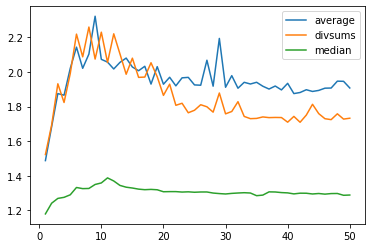

In [12]:
plt.plot(avg_delay_factor_feedback, label='average')
plt.plot(divSums_delay_factor_feedback, label='divsums')
plt.plot(median_delay_factor_feedback, label='median')

plt.legend()
plt.show()

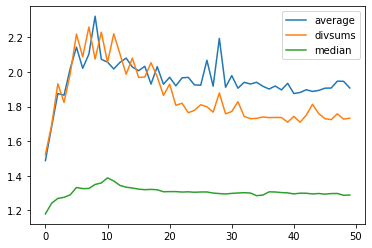

In [13]:
plt.plot(computed_avg_delay_factor_feedback, label='average')
plt.plot(computed_divSums_delay_factor_feedback, label='divsums')
plt.plot(computed_median_delay_factor_feedback, label='median')

plt.legend()
plt.show()

In [14]:
n_trips_average = [df.shape[0] for df in data_10_pct_average['drt_trips_stats']]
n_trips_median = [df.shape[0] for df in data_10_pct_median['drt_trips_stats']]
n_trips_divSums = [df.shape[0] for df in data_10_pct_divSums['drt_trips_stats']]
n_trips_divSums_wrong = [df.shape[0] for df in data_10_pct_divSums_wrong['drt_trips_stats']]

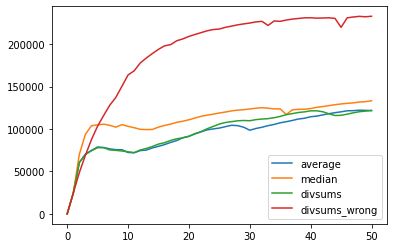

In [15]:
plt.plot(n_trips_average, label='average')
plt.plot(n_trips_median, label='median')
plt.plot(n_trips_divSums, label='divsums')
plt.plot(n_trips_divSums_wrong, label='divsums_wrong')

plt.legend()
plt.show()

In [16]:
avg_waitTime_feedback = [df.avg[0]/ 60 for df in data_10_pct_average['global_avg']]
median_waitTime_feedback = [df['median'][0] / 60 for df in data_10_pct_median['global_avg']]
divSums_waitTime_feedback = [df.avg[0] / 60 for df in data_10_pct_divSums['global_avg']]

In [17]:
computed_avg_waitTime_feedback = [df.waitTime.mean() for df in data_10_pct_average['drt_trips_stats'][1:]]
computed_median_waitTime_feedback = [df.waitTime.median() for df in data_10_pct_median['drt_trips_stats'][1:]]
computed_divSums_waitTime_feedback = [df.waitTime.mean() for df in data_10_pct_divSums['drt_trips_stats'][1:]]

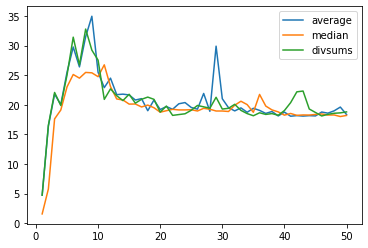

In [18]:
plt.plot(avg_waitTime_feedback, label='average')
plt.plot(median_waitTime_feedback, label='median')
plt.plot(divSums_waitTime_feedback, label='divsums')

plt.legend()
plt.show()

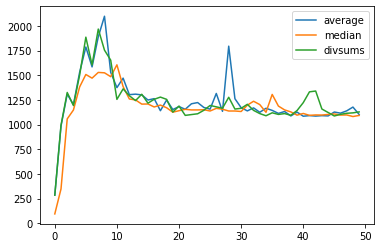

In [19]:
plt.plot(computed_avg_waitTime_feedback, label='average')
plt.plot(computed_median_waitTime_feedback, label='median')
plt.plot(computed_divSums_waitTime_feedback, label='divsums')

plt.legend()
plt.show()

# Check why the divSums is higher than avg

In [41]:
def avg_by_time_bin(drt_trips_stats, column, start_time=6, end_time=24, bin_duration_min=30):
    legs = drt_trips_stats.copy()
    n_bins = (end_time - start_time) * 60 // bin_duration_min
    bins = [start_time*3600 + i*bin_duration_min*60 for i in range(0,n_bins+1)]
    legs['time_bin'] = pd.cut(legs.startTime, bins).map(lambda x: int((x.left + x.right)/2))
    if column == 'compute_total_delay_factor_estimated':
        grouped = legs.groupby(['time_bin'])['totalTravelTime'].sum() / legs.groupby(['time_bin'])['estimatedUnsharedTime'].sum()
    elif column == 'compute_total_delay_factor_router':
        grouped = legs.groupby(['time_bin'])['totalTravelTime'].sum() / legs.groupby(['time_bin'])['routerUnsharedTime'].sum()
    else:
        grouped = legs.groupby(['time_bin'])[column].mean()
    return grouped

In [45]:
avg_1 = avg_by_time_bin(data_10_pct_average['drt_trips_stats'][-1], column = 'delayFactor')

In [46]:
avg_2 = avg_by_time_bin(data_10_pct_average['drt_trips_stats'][-1], column = 'compute_total_delay_factor_router')

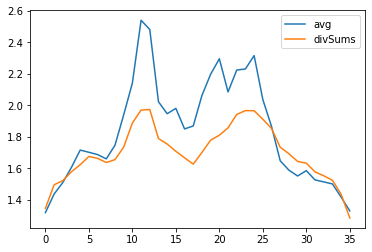

In [48]:
plt.plot(avg_1, label='avg')
plt.plot(avg_2, label='divSums')
plt.legend()
plt.show()

In [51]:
divSums_1 = avg_by_time_bin(data_10_pct_divSums['drt_trips_stats'][-1], column = 'delayFactor')
divSums_2 = avg_by_time_bin(data_10_pct_divSums['drt_trips_stats'][-1], column = 'compute_total_delay_factor_router')

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/matplotlib/axes/_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


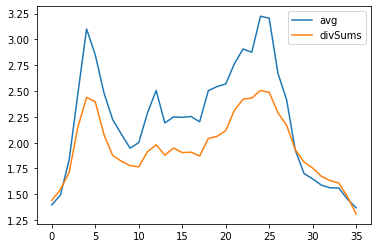

In [52]:
plt.plot(divSums_1, label='avg')
plt.plot(divSums_2, label='divSums')
plt.legend()
plt.show()

In [49]:
data_10_pct_average['drt_trips_stats'][-1].delayFactor.describe()

count    121677.000000
mean          1.907392
std           3.567886
min           0.023733
25%           1.105713
50%           1.276152
75%           1.763832
max         366.000000
Name: delayFactor, dtype: float64

In [50]:
data_10_pct_average['drt_trips_stats'][-1].totalTravelTime.sum() / data_10_pct_average['drt_trips_stats'][-1].routerUnsharedTime.sum()

1.7153188515974314